# Mitosis detection 
## medical image processing, 4th semester 
##### mitosis_data_set structure:

mitosis_data_set/X_Y.png

X = image number

Y = expected mitosis

it needs about 1.6 min to compile all 20 images

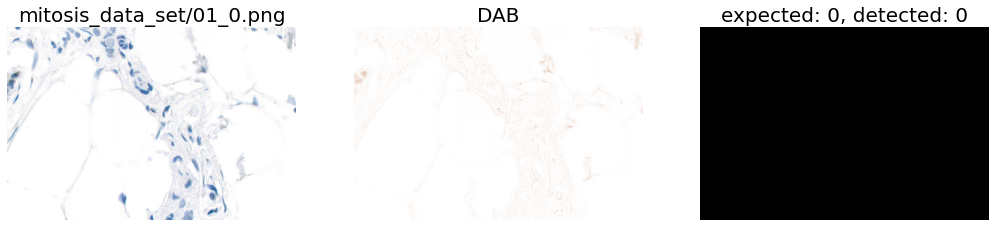

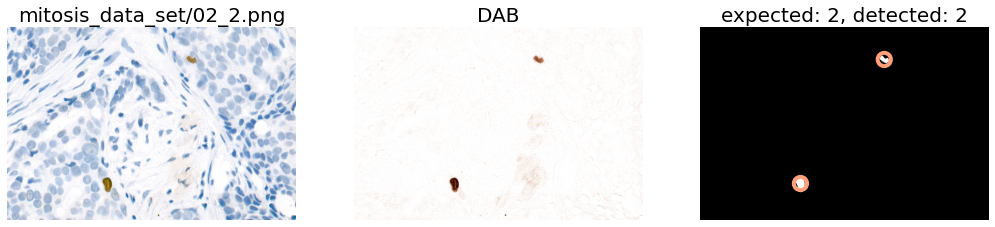

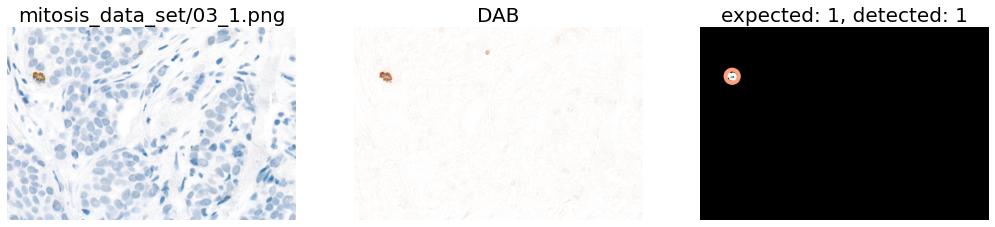

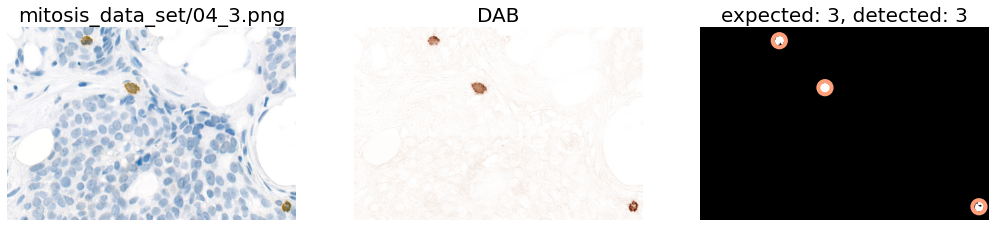

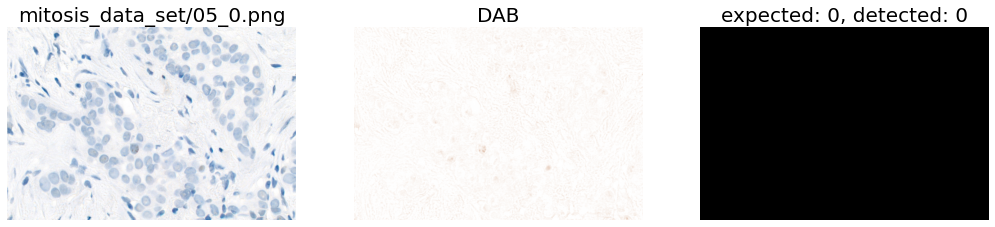

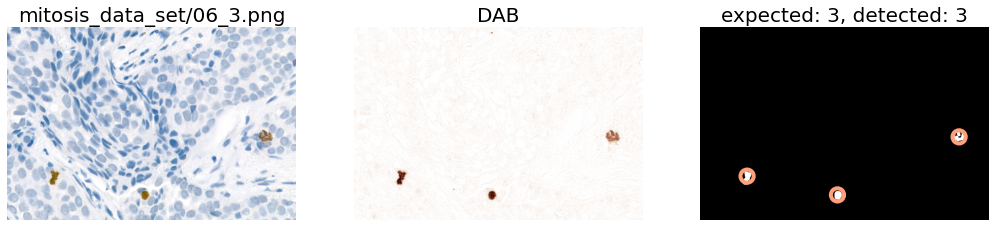

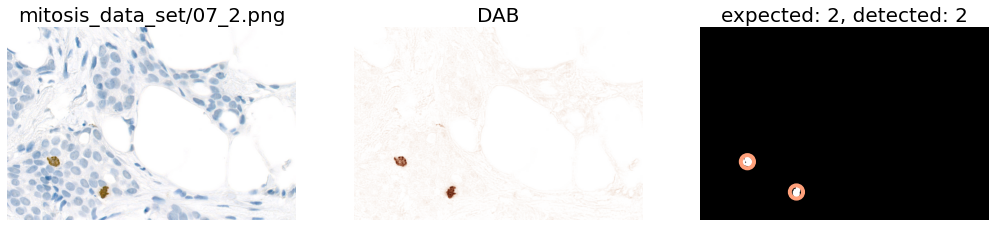

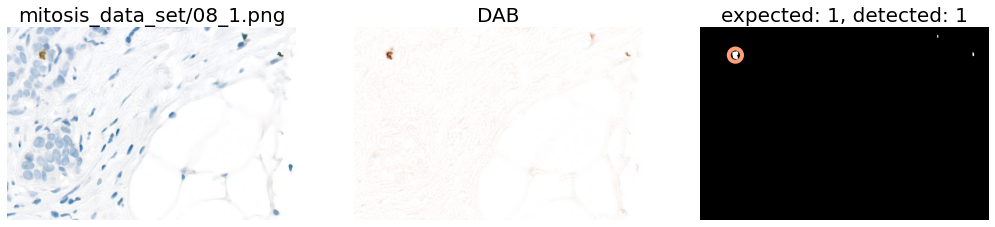

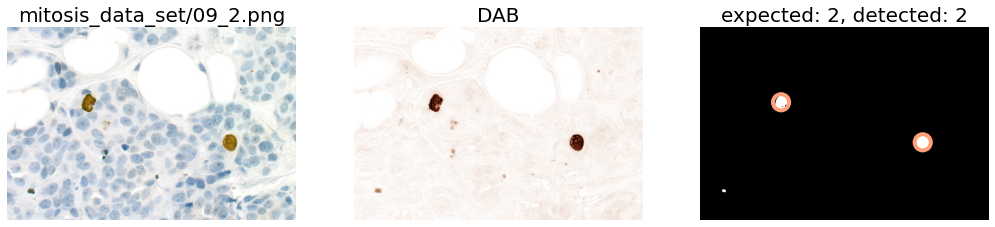

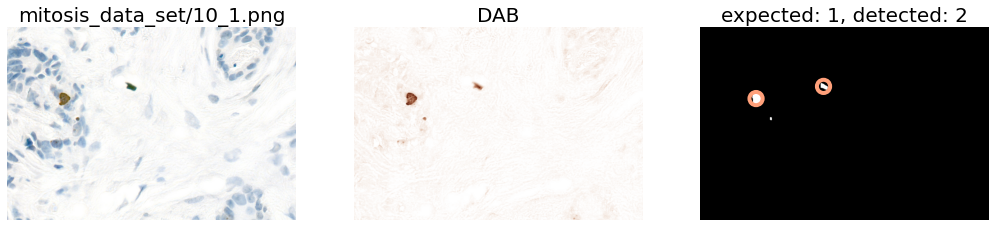

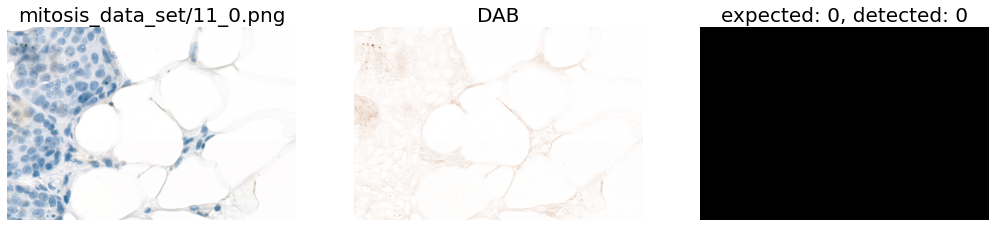

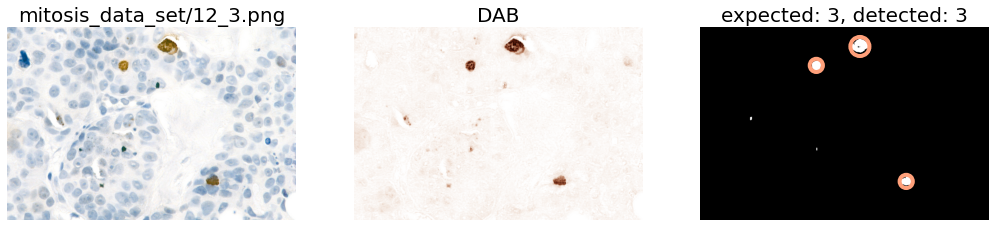

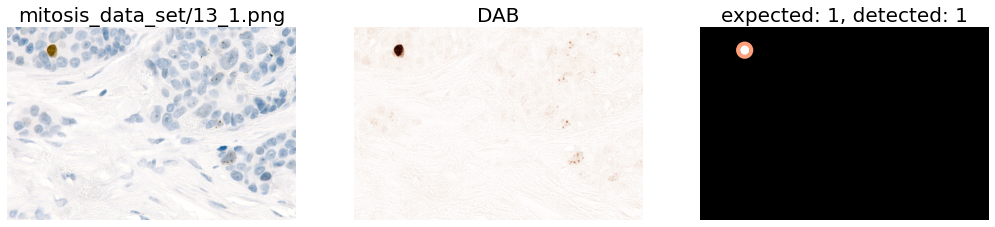

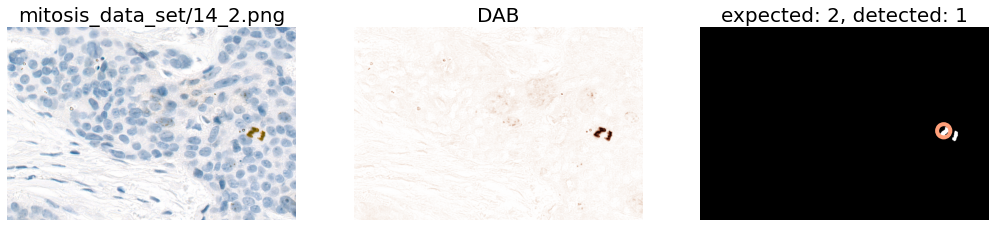

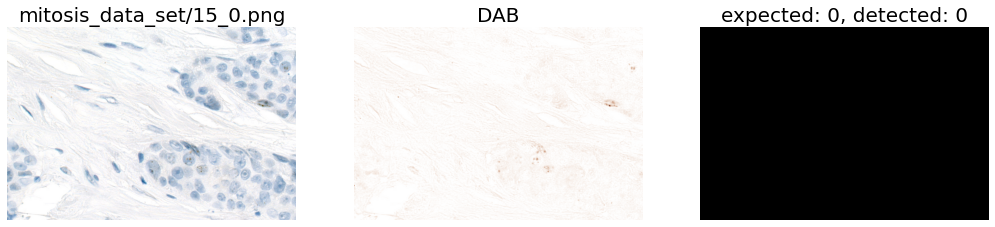

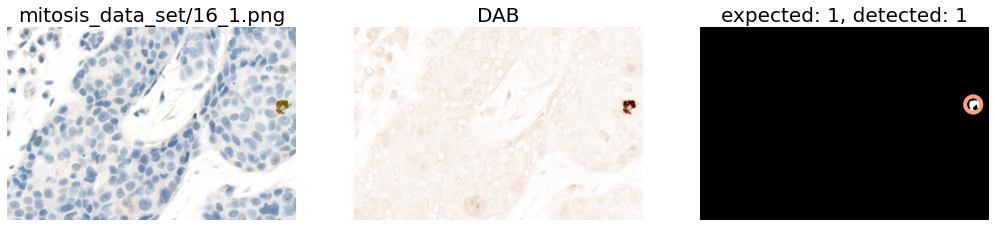

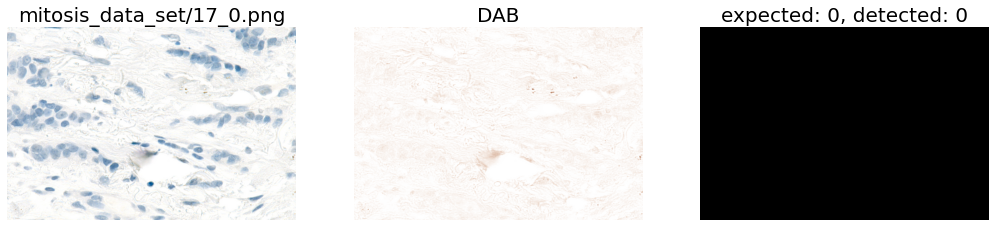

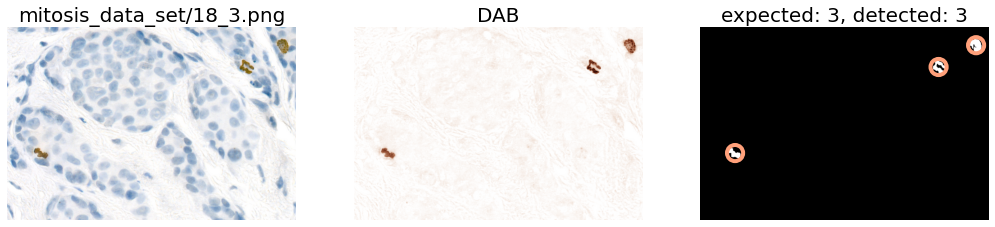

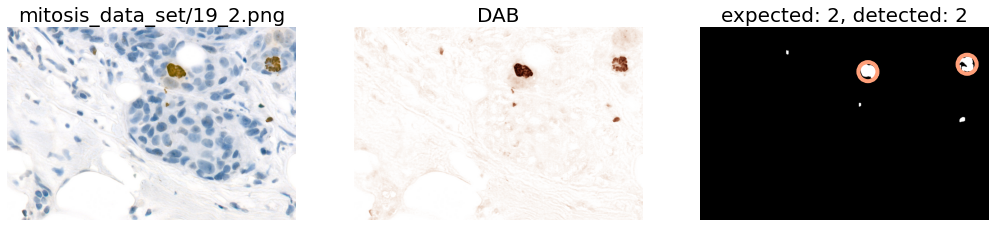

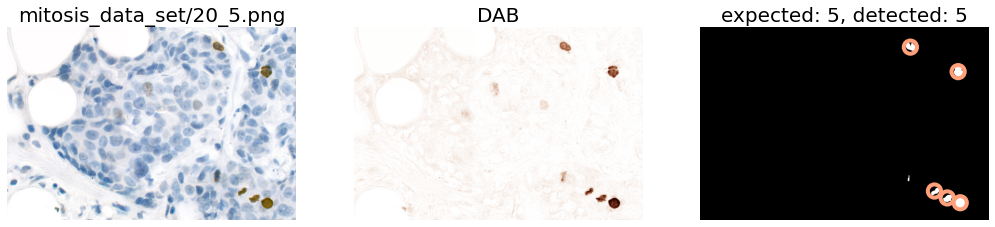

In [1]:
# The resolution of the digitization is: 0.1213 mpp → mpp = microns per pixel = micrometers per pixel
# A cell nucleus in mammals is about 5 to 15 micrometers in size (depending on the type of tissue)

import matplotlib.pyplot as plt
from skimage.color import rgb2hed, hed2rgb
from skimage.feature import blob_doh
import cv2
import numpy as np
from skimage import data, filters, exposure


def countMitosis(img, expected, minsize=5, maxsize=15, mpp=0.1213):
    # limits
    lower = minsize/mpp
    upper = maxsize/mpp
    thresh = mpp/(maxsize-(minsize+1))  # minsize=6 -> "ca. 5 to 15 micrometer"

    #read img convert to gray, dab
    image = cv2.imread(img)
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hed = rgb2hed(imgRGB)
    null = np.zeros_like(hed[:, :, 0])
    imgDAB = hed2rgb(np.stack((null, null, hed[:, :, 2]), axis=-1))
    # opencv only works with 'float32'
    imgGray = cv2.cvtColor(imgDAB.astype('float32'), cv2.COLOR_BGR2GRAY)

    # otsu
    val = filters.threshold_otsu(imgGray)
    hist, bins_center = exposure.histogram(imgGray)
    # adjust otsu for images without mitosis
    # the value 0.95 comes from interpreting the threshvalue from the Otsu histogram for images without mitoses
    if val > 0.95:  # when threshhold over 0.95 because theres no mitosis, set it to 0
        val = 0
    imgBin = imgGray < val

    # clean artifacts
    kernel_size = (minsize, maxsize)
    kernel_el = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
    eroded = cv2.erode(imgBin.astype('float32'), kernel_el, (-1, -1))
    cleaned = cv2.dilate(eroded, kernel_el, (-1, -1))

    # blob
    blobs = blob_doh(cleaned.astype('double'), min_sigma=lower,
                     max_sigma=upper, threshold=thresh)

    # display
    plt.figure(figsize=(30, 30))

    plt.subplot(151)
    plt.title(str(img), fontsize=20)
    plt.imshow(imgRGB)
    plt.axis("off")

    plt.subplot(152)
    plt.title("DAB", fontsize=20)
    plt.imshow(imgDAB)
    plt.axis("off")

# got val=0.95 from intepreting this otsu-histogram on images without mitosis:
    # plt.subplot(153)
    # plt.plot(bins_center, hist, lw = 1)
    # plt.axvline(val, color = 'k', ls = '--')
    # plt.title(f"Otsu = {val}") # -> otsu shouldnt be over 0.95
    # plt.tight_layout()

    ax = plt.subplot(153)
    plt.imshow(cleaned, cmap="gray")
    counter = 0
    for blob in blobs:
        y, x, r = blob
#         print(r)
        c = plt.Circle((x, y), r, color="lightsalmon", linewidth=4, fill=False)
        ax.add_patch(c)
        counter += 1
    plt.title("expected: " + str(expected) +
              ", detected: " + str(counter), fontsize=20)
    plt.axis("off")

    plt.show

countMitosis("mitosis_data_set/01_0.png", expected=0)  # zero
countMitosis("mitosis_data_set/02_2.png", expected=2)
countMitosis("mitosis_data_set/03_1.png", expected=1)
countMitosis("mitosis_data_set/04_3.png", expected=3)
countMitosis("mitosis_data_set/05_0.png", expected=0)  # zero

countMitosis("mitosis_data_set/06_3.png", expected=3)
countMitosis("mitosis_data_set/07_2.png", expected=2)
countMitosis("mitosis_data_set/08_1.png", expected=1)
countMitosis("mitosis_data_set/09_2.png", expected=2)
countMitosis("mitosis_data_set/10_1.png", expected=1)  # exp1 dec2 problemimage

countMitosis("mitosis_data_set/11_0.png", expected=0)  # zero
countMitosis("mitosis_data_set/12_3.png", expected=3)
countMitosis("mitosis_data_set/13_1.png", expected=1)
countMitosis("mitosis_data_set/14_2.png", expected=2)  # exp2 dec1 problemimage
countMitosis("mitosis_data_set/15_0.png", expected=0)  # zero

countMitosis("mitosis_data_set/16_1.png", expected=1)
countMitosis("mitosis_data_set/17_0.png", expected=0)  # zero
countMitosis("mitosis_data_set/18_3.png", expected=3)
countMitosis("mitosis_data_set/19_2.png", expected=2)
countMitosis("mitosis_data_set/20_5.png", expected=5)